In [1]:
import sys
import os
import matplotlib.pyplot as plt
BASE_DIR = os.getcwd()
sys.path.append(os.path.abspath(BASE_DIR))
from model_history import ModelHistory

In [2]:
path = BASE_DIR+"\loss_history/all_loss.json"
data = ModelHistory.load_history_json(path)

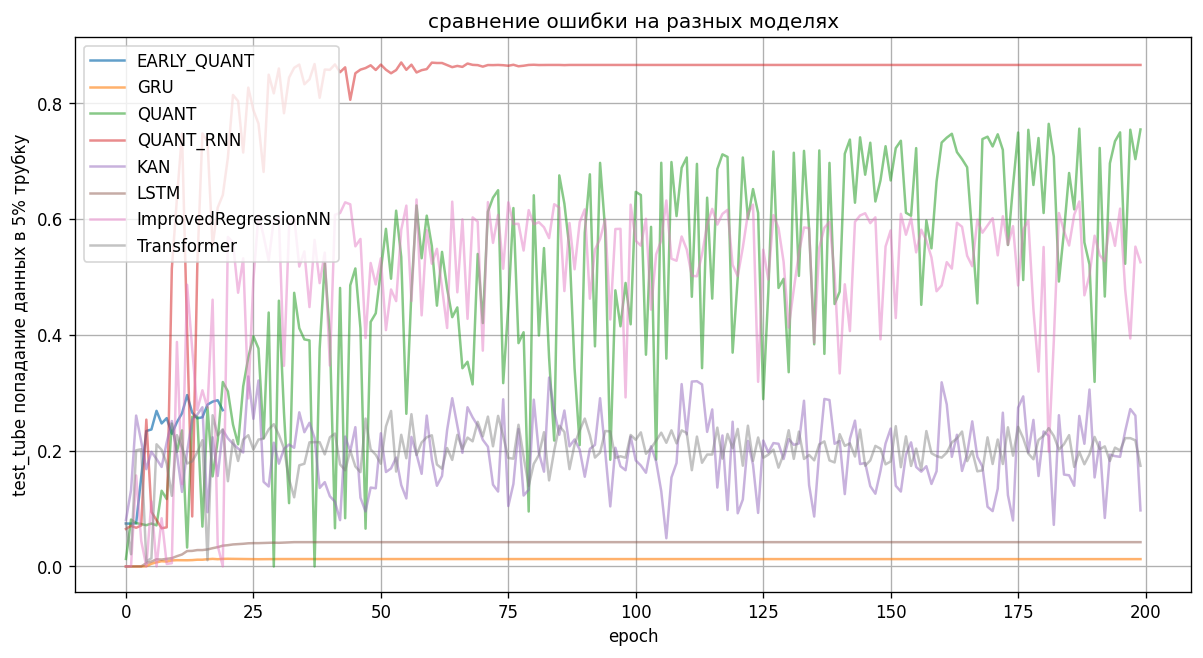

In [4]:
loss = 'test_tube'
plt.figure(figsize=(12,6), dpi=120)
for index,(key,item) in enumerate(data.items()):
    plt.plot([i for i in range(len(item[loss][:200]))],item[loss][:200],label=key, alpha = 0.7*(1/(index+1)**(0.2)))
plt.xlabel('epoch')
plt.ylabel(loss+' попадание данных в 5% трубку')
plt.title('сравнение ошибки на разных моделях')
plt.legend()
plt.grid(True)

plt.show()